In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline
%run "functions.ipynb"

# Loading raw data

In [2]:
dataPath = '../data/cgu/'
dataName = 'CGU_data_class_touse.xlsx'
data = pd.read_excel(dataPath+dataName, encoding='utf-8')

# deleting irregularities with no description
#data = data[data['descricao_sumaria'].notnull()] 
len(data)

81715

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81715 entries, 0 to 81714
Data columns (total 22 columns):
Id_Irreg             81715 non-null object
Id_Mun_Sort          81715 non-null object
Municipio            81715 non-null object
UF                   81715 non-null object
Ed_Sorteio           81715 non-null int64
Ano_Sorteio          81715 non-null int64
Ano_Auditoria        81715 non-null int64
Nr_OS                81715 non-null int64
Montante_fisc        76264 non-null float64
Orgao_Sup            81715 non-null object
Orgao_Sup_cod        81715 non-null object
Programa             81590 non-null object
Acao                 79249 non-null object
Tipo_constatacao     81715 non-null object
descricao_sumaria    81669 non-null object
Ind_class            81715 non-null int64
Class                4200 non-null object
Class_n              4166 non-null float64
Class_10             4166 non-null float64
Class_2              4166 non-null float64
Cod_9                4166 non-null o

In [4]:
dataPath = '../data/cgu/'
dataName = 'CGU_data_OS.xlsx'
data_OS = pd.read_excel(dataPath+dataName, encoding='utf-8')

data_OS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29822 entries, 0 to 29821
Data columns (total 15 columns):
Id_Mun_Sort         29821 non-null object
Municipio           29821 non-null object
UF                  29821 non-null object
Ed_Sorteio          29821 non-null float64
Ano_Sorteio         29821 non-null float64
Nr_OS               29821 non-null float64
Montante_fisc       27505 non-null float64
IdOrgao             29821 non-null float64
Orgao_Sup           29821 non-null object
Funcao              28216 non-null object
Funcao_padrao       28216 non-null object
Subfuncao           28216 non-null object
Subfuncao_padrao    28216 non-null object
Programa            29632 non-null object
Acao                28216 non-null object
dtypes: float64(5), object(10)
memory usage: 3.4+ MB


# Random analyses

## Number of OS by municipality

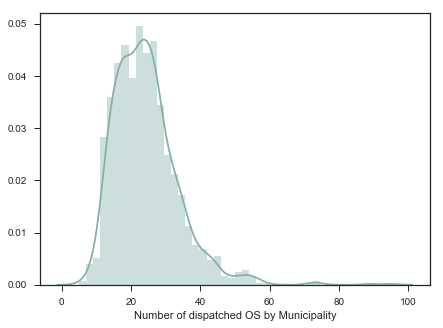

In [6]:
group_os = data_OS[['Id_Mun_Sort', 'Nr_OS']].groupby('Id_Mun_Sort').count().reset_index()
group_os = group_os.rename(columns={'Nr_OS': 'Number of dispatched OS by Municipality'})
sns.distplot(group_os['Number of dispatched OS by Municipality'], kde=True, color='#83B0A8')

In [8]:
np.mean(group_os['Number of dispatched OS by Municipality'])

24.383483237939494

In [9]:
len(group_os)

1223

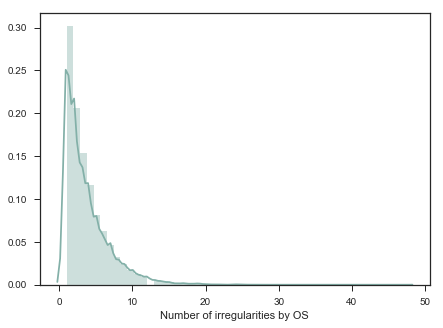

In [11]:
group_os_irreg = data[['Id_Irreg', 'Nr_OS']].groupby('Nr_OS').count().reset_index()
group_os_irreg = group_os_irreg.rename(columns={'Id_Irreg': 'Number of irregularities by OS'})
sns.distplot(group_os_irreg['Number of irregularities by OS'], kde=True, color='#83B0A8')

In [12]:
np.mean(group_os_irreg['Number of irregularities by OS'])

3.6851718228555965

In [13]:
len(group_os_irreg)

22174

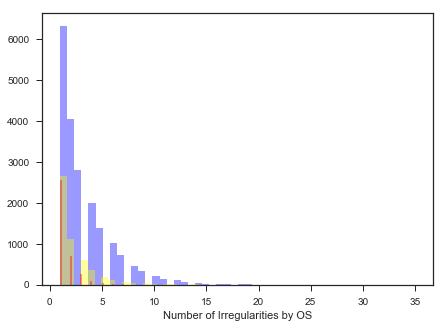

In [14]:
group_grave_os = data[['Nr_OS', 'Id_Irreg', 'Tipo_constatacao']][data['Tipo_constatacao']=='Falha Grave'].groupby('Nr_OS').count().reset_index()
group_media_os = data[['Nr_OS', 'Id_Irreg', 'Tipo_constatacao']][data['Tipo_constatacao']=='Falha Média'].groupby('Nr_OS').count().reset_index()
group_formal_os = data[['Nr_OS', 'Id_Irreg', 'Tipo_constatacao']][data['Tipo_constatacao']=='Falha Formal'].groupby('Nr_OS').count().reset_index()
group_grave_os = group_grave_os.rename(columns={'Id_Irreg': 'Number of Irregularities by OS'})
group_media_os = group_media_os.rename(columns={'Id_Irreg': 'Number of Irregularities by OS'})
group_formal_os = group_formal_os.rename(columns={'Id_Irreg': 'Number of Irregularities by OS'})
sns.distplot(group_media_os['Number of Irregularities by OS'], kde=False, color='blue')
sns.distplot(group_grave_os['Number of Irregularities by OS'], kde=False, color='yellow')
sns.distplot(group_formal_os['Number of Irregularities by OS'], kde=False, color='red')

## Number of irregularities by municipality

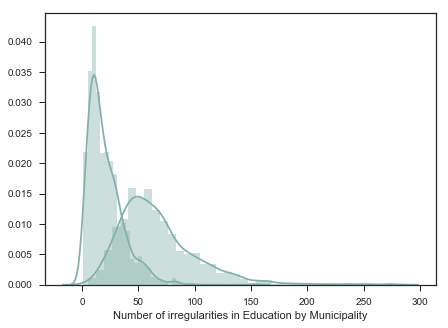

In [41]:
sns.distplot(group_irreg['Number of Irregularities by Municipality'], kde=True, color='#83B0A8')
sns.distplot(group_educ['Number of irregularities in Education by Municipality'], kde=True, color='#83B0A8')

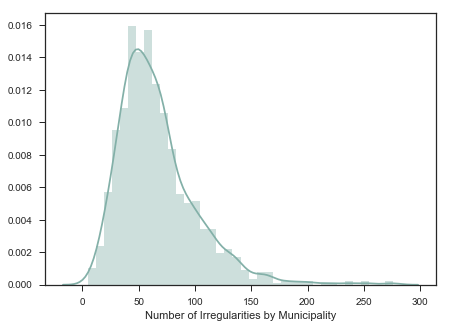

In [19]:
group_irreg = data[['Id_Mun_Sort', 'Id_Irreg', 'Tipo_constatacao']].groupby('Id_Mun_Sort').count().reset_index()
group_irreg = group_irreg.rename(columns={'Id_Irreg': 'Number of Irregularities by Municipality'})
sns.distplot(group_irreg['Number of Irregularities by Municipality'], kde=True, color='#83B0A8')
sns.distplot(group_educ['Number of irregularities in Education by Municipality'], kde=True, color='#83B0A8')

In [40]:
group_irreg.mean()

Number of Irregularities by Municipality    66.815209
Tipo_constatacao                            66.815209
dtype: float64

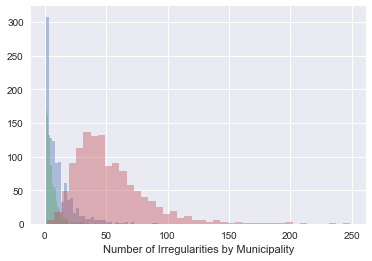

In [113]:
group_grave = data[['Id_Mun_Sort', 'Id_Irreg', 'Tipo_constatacao']][data['Tipo_constatacao']=='Falha Grave'].groupby('Id_Mun_Sort').count().reset_index()
group_media = data[['Id_Mun_Sort', 'Id_Irreg', 'Tipo_constatacao']][data['Tipo_constatacao']=='Falha Média'].groupby('Id_Mun_Sort').count().reset_index()
group_formal = data[['Id_Mun_Sort', 'Id_Irreg', 'Tipo_constatacao']][data['Tipo_constatacao']=='Falha Formal'].groupby('Id_Mun_Sort').count().reset_index()
group_grave = group_grave.rename(columns={'Id_Irreg': 'Number of Irregularities by Municipality'})
group_media = group_media.rename(columns={'Id_Irreg': 'Number of Irregularities by Municipality'})
group_formal = group_formal.rename(columns={'Id_Irreg': 'Number of Irregularities by Municipality'})
sns.distplot(group_grave['Number of Irregularities by Municipality'], kde=False)
sns.distplot(group_formal['Number of Irregularities by Municipality'], kde=False)
sns.distplot(group_media['Number of Irregularities by Municipality'], kde=False)

## Number of Irregularities per Ministry

In [39]:
group_educ.mean()

Number of irregularities in Education by Municipality    20.751905
Orgao_Sup_cod                                            20.751905
dtype: float64

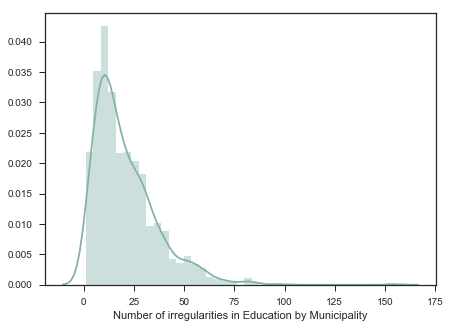

In [37]:
group_educ = data[['Id_Mun_Sort', 'Id_Irreg', 'Orgao_Sup_cod']][data['Orgao_Sup_cod']=='EDUC'].groupby('Id_Mun_Sort').count().reset_index()
group_educ = group_educ.rename(columns={'Id_Irreg': 
                                            'Number of irregularities in Education by Municipality'})
sns.distplot(group_educ['Number of irregularities in Education by Municipality'], kde=True, color='#83B0A8')

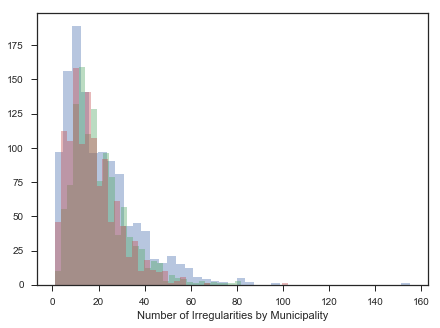

In [24]:
group_educ = data[['Id_Mun_Sort', 'Id_Irreg', 'Orgao_Sup_cod']][data['Orgao_Sup_cod']=='EDUC'].groupby('Id_Mun_Sort').count().reset_index()
group_saud = data[['Id_Mun_Sort', 'Id_Irreg', 'Orgao_Sup_cod']][data['Orgao_Sup_cod']=='SAU'].groupby('Id_Mun_Sort').count().reset_index()
group_fome = data[['Id_Mun_Sort', 'Id_Irreg', 'Orgao_Sup_cod']][data['Orgao_Sup_cod']=='FOME'].groupby('Id_Mun_Sort').count().reset_index()
group_educ = group_educ.rename(columns={'Id_Irreg': 'Number of Irregularities by Municipality'})
group_saud = group_saud.rename(columns={'Id_Irreg': 'Number of Irregularities by Municipality'})
group_fome = group_fome.rename(columns={'Id_Irreg': 'Number of Irregularities by Municipality'})
sns.distplot(group_educ['Number of Irregularities by Municipality'], kde=False)
sns.distplot(group_saud['Number of Irregularities by Municipality'], kde=False)
sns.distplot(group_fome['Number of Irregularities by Municipality'], kde=False)

In [141]:
data[['Tipo_constatacao', 'Id_Irreg']].groupby('Tipo_constatacao').count().sort_values(by='Id_Irreg', ascending=False).reset_index()

,Tipo_constatacao,Id_Irreg
0,Falha Média,64547
1,Falha Grave,11590
2,Falha Formal,5532


In [142]:
data[['Orgao_Sup_cod', 'Id_Irreg']].groupby('Orgao_Sup_cod').count().sort_values(by='Id_Irreg', ascending=False).reset_index()

,Orgao_Sup_cod,Id_Irreg
0,EDUC,24487
1,SAU,24099
2,FOME,21179
3,CID,3400
4,AGRA,1469
5,TUR,1217
6,COM,1161
7,NAC,1065
8,AGRI,873
9,ESP,826


# Frequency of words/bigrams

In [151]:
#list of portuguese stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')
extra = ['nº', 'N.º', 'r'] # Should we include these extra stopwords? - *r comes from R $ *
[stopwords.append(word) for word in extra];  
    
#tokens
data['tokens'] = data['descricao_sumaria'].apply(tok_text) 

#bigrams
bigrams = [list(nltk.bigrams(text)) for text in data['tokens']]
data['bigrams'] = bigrams

#tokens and bigrams
features = data['descricao_sumaria'].apply(tok_text) + [list(nltk.bigrams(text)) for text in data['tokens']]
data['features'] = features

#counting number of tokens
data['length'] = data['tokens'].apply(len)

data.head()

,Id_Irreg,Id_Mun_Sort,Municipio,UF,Ed_Sorteio,Ano_Sorteio,Ano_Auditoria,Nr_OS,Montante_fisc,Orgao_Sup,...,Tipo_constatacao,descricao_sumaria,Ind_class,Class,Class_n,Class_2,tokens,bigrams,features,length
0,Afogados da Ingazeira_040_1,Afogados da Ingazeira_040,Afogados da Ingazeira,PE,40,2015,2015,201501415,181192.8,MINISTERIO DA SAUDE,...,Falha Formal,Contrapartida municipal na Assistência Farmacê...,0,NaN,NaN,NaN,"[contrapartida, municip, assistência, farmacêu...","[(contrapartida, municip), (municip, assistênc...","[contrapartida, municip, assistência, farmacêu...",16
1,Afogados da Ingazeira_040_2,Afogados da Ingazeira_040,Afogados da Ingazeira,PE,40,2015,2015,201501415,181192.8,MINISTERIO DA SAUDE,...,Falha Formal,Falta de atestado de conferência e recebimento...,0,NaN,NaN,NaN,"[falta, atestado, conferência, recebimento, me...","[(falta, atestado), (atestado, conferência), (...","[falta, atestado, conferência, recebimento, me...",11
2,Afogados da Ingazeira_040_3,Afogados da Ingazeira_040,Afogados da Ingazeira,PE,40,2015,2015,201501415,181192.8,MINISTERIO DA SAUDE,...,Falha Média,Ineficiência do controle de estoque de medicam...,0,NaN,NaN,NaN,"[ineficiência, control, estoqu, medicamento, u...","[(ineficiência, control), (control, estoqu), (...","[ineficiência, control, estoqu, medicamento, u...",7
3,Afogados da Ingazeira_040_4,Afogados da Ingazeira_040,Afogados da Ingazeira,PE,40,2015,2015,201501415,181192.8,MINISTERIO DA SAUDE,...,Falha Média,Ineficiência do controle de estoque de medicam...,0,NaN,NaN,NaN,"[ineficiência, control, estoqu, medicamento, a...","[(ineficiência, control), (control, estoqu), (...","[ineficiência, control, estoqu, medicamento, a...",9
4,Afogados da Ingazeira_040_5,Afogados da Ingazeira_040,Afogados da Ingazeira,PE,40,2015,2015,201501415,181192.8,MINISTERIO DA SAUDE,...,Falha Média,Previsões editalícias restritivas ao caráter c...,0,NaN,NaN,NaN,"[previsõ, editalícia, restritiva, caráter, com...","[(previsõ, editalícia), (editalícia, restritiv...","[previsõ, editalícia, restritiva, caráter, com...",9


In [152]:
freqTokens = word_freq(data, 'tokens')
print('Entire dataset: ',freqTokens.most_common()[:20])

Entire dataset:  [('ausência', 14558), ('recurso', 12174), ('programa', 11678), ('saúd', 9663), ('municip', 8002), ('família', 7579), ('falta', 6320), ('despesa', 5660), ('escolar', 5289), ('control', 5149), ('pagamento', 4723), ('processo', 4585), ('conselho', 4487), ('execução', 4391), ('licitatório', 4281), ('bolsa', 4028), ('beneficiário', 3849), ('serviço', 3822), ('município', 3661), ('convênio', 3646)]


In [154]:
tokens = pd.Series(dict(freqTokens))
tokens = tokens.sort_values(ascending=False)
tokens.describe().round()

count     9738.0
mean        64.0
std        389.0
min          1.0
25%          1.0
50%          3.0
75%         13.0
max      14558.0
dtype: float64

In [153]:
freqBigrams = word_freq(data, 'bigrams')
print('Entire dataset: ',freqBigrams.most_common()[:20])

Entire dataset:  [(('bolsa', 'família'), 3737), (('processo', 'licitatório'), 3108), (('programa', 'bolsa'), 2865), (('municip', 'saúd'), 2767), (('saúd', 'família'), 2169), (('conselho', 'municip'), 2101), (('contrato', 'repass'), 1965), (('beneficiário', 'programa'), 1418), (('recurso', 'federai'), 1361), (('ausência', 'comprovação'), 1356), (('assistência', 'social'), 1332), (('alimentação', 'escolar'), 1248), (('per', 'capita'), 1217), (('transport', 'escolar'), 1213), (('control', 'social'), 1212), (('renda', 'per'), 1185), (('prestação', 'conta'), 1160), (('atenção', 'básica'), 1139), (('prefeitura', 'municip'), 1091), (('partido', 'político'), 1067)]


In [155]:
bigrams = pd.Series(dict(freqBigrams))
bigrams = bigrams.sort_values(ascending=False)
bigrams.describe().round()

count    103182.0
mean          5.0
std          37.0
min           1.0
25%           1.0
50%           1.0
75%           2.0
max        3737.0
dtype: float64

In [156]:
freqFeatures = word_freq(data, 'features')
print('Entire dataset: ',freqFeatures.most_common()[:20])

Entire dataset:  [('ausência', 14558), ('recurso', 12174), ('programa', 11678), ('saúd', 9663), ('municip', 8002), ('família', 7579), ('falta', 6320), ('despesa', 5660), ('escolar', 5289), ('control', 5149), ('pagamento', 4723), ('processo', 4585), ('conselho', 4487), ('execução', 4391), ('licitatório', 4281), ('bolsa', 4028), ('beneficiário', 3849), ('serviço', 3822), (('bolsa', 'família'), 3737), ('município', 3661)]


In [157]:
features = pd.Series(dict(freqFeatures))
features = features.sort_values(ascending=False)
features.describe().round()

count    112920.0
mean         10.0
std         121.0
min           1.0
25%           1.0
50%           1.0
75%           3.0
max       14558.0
dtype: float64